In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def barplot(mean, alg, title, save=None, interest=0):
    N = 4

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(111)
    rects1 = ax.barh(ind, mean, width, color='r')
    if interest > 0:
        func = np.min
    else:
        func = np.max
    ax.axvline(x=func(mean), ymin=0, ymax = 5, linewidth=1, color='b')

    # add some text for labels, title and axes ticks
    ax.set_xlabel(title)
    ax.set_yticks(ind)
    ax.set_yticklabels(alg)
    
    if save is not None:
        fig.savefig(save)
    plt.show()

In [3]:
def barplot_list(mean, alg, title, save=None, interest=0, prog=False, figsize=None):
    

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.25       # the width of the bars
    if figsize is None:
        fig = plt.figure(dpi=300)

    else:
        fig = plt.figure(figsize=figsize, dpi=300)
    ax = fig.add_subplot(111)
    
    if len(data[0]) == 3:
        width = 0.25       # the width of the bars
    
    else:
        width = 0.15
        
        
    rects = [] 
    color = ["r", "g", "y", "b", "purple"]
    if prog:
        color = ['darkred', "red", "tomato", "salmon"]
    for i in range(len(data[0])):    
        rects.append(ax.barh(ind + i * width, zip(*data)[i], width, color=color[i]))
        
    anchor_param = (0.8, 0.8)
    leg_rec = [x[0] for x in rects]
    leg_lab = ('ASW', 'ARI', 'NMI', "BE", "BASW")
    if prog:
        leg_lab = ["2", "3", "4", "7"]
    ax.legend(leg_rec, leg_lab[:len(data[0])] )
    #rects2 = ax.bar(ind+width, zvals, width, color='g')
    #if interest > 0:
    #    func = np.min
    #else:
    #    func = np.max
    #ax.axvline(x=func(mean), ymin=0, ymax = 5, linewidth=1, color='b')

    # add some text for labels, title and axes ticks
    ax.set_xlabel(title)
    ax.set_yticks(ind + width)
    ax.set_yticklabels(alg)
    plt.tight_layout()

In [4]:
def barplot_CITE_list(mean, alg, title, save=None, interest=0, figsize=None):
    

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.25       # the width of the bars
    
    if figsize is None:
        fig, ax1 = plt.subplots()
    else:
        fig, ax1 = plt.subplots(figsize=figsize)
    rect1 = ax1.barh(ind, zip(*data)[0], width, color="b")
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_xlabel('Spearman Correlation', color='b')
    ax1.tick_params('x', colors='b')    
    
    ax2 = ax1.twiny()
    rect2 = ax2.barh(ind + width, zip(*data)[1], width, color="r")
    ax2.set_xlabel('Fold Enrichment', color='r')
    ax2.tick_params('x', colors='r')

    ax1.set_title(title, y=-0.3)
    ax1.set_yticks(ind + width)
    ax1.set_yticklabels(alg)
    plt.tight_layout()

# CORTEX MULTI

In [12]:
alg = ["FA", "ZIFA", "ZINB-WaVE", "SIMLR", "scVI"]
fa = [[0.11581131621741773, 0.27312842428258505, 0.29890142393022651],
[0.13797953173246824, 0.35827752246474137, 0.31243455865964415],
[0.16330256646100386, 0.5281002482621574, 0.43436435453448607],
[0.21151757370266544, 0.78013724807955642, 0.78688963604064266]]
zifa = [[0.10760864940650154, 0.27739547166803474, 0.3047726295034825],
[0.13207018700791912, 0.33238196759272998, 0.23560128683050038],
[0.15602621812120895, 0.4890464265132512, 0.39260959628267939],
[0.20493195811497675, 0.7621022202234099, 0.76261580271279172]]
zinb = [[0.26307611328993241, 0.86133243308042906, 0.91825852643537653],
[0.26120556769903069, 0.72846126262601396, 0.81089804731570525],
[0.28948372843281256, 0.7307396743553678, 0.71783886252317064],
[0.26175088291560739, 0.77674732406327229, 0.72310898818408831]]
simlr = [[0.35581114086547649, 0.39763026135241941, 0.33581111107441836],
[0.47594514783811925, 0.42182382206636898, 0.30828147637529074],
[0.59177936314164903, 0.667961741036047, 0.53600416126351158],
[0.57610561187014786, 0.75222293463073531, 0.67924145540151004]]
scVI = [[0.32763597, 0.76727788550279996, 0.85143768403508435],
[0.2937676, 0.69296827058660748, 0.77395790102006323],
[0.32925251, 0.69496427498138469, 0.6757547322038292],
[0.29131631, 0.7885597929239393, 0.81132417587061612]]

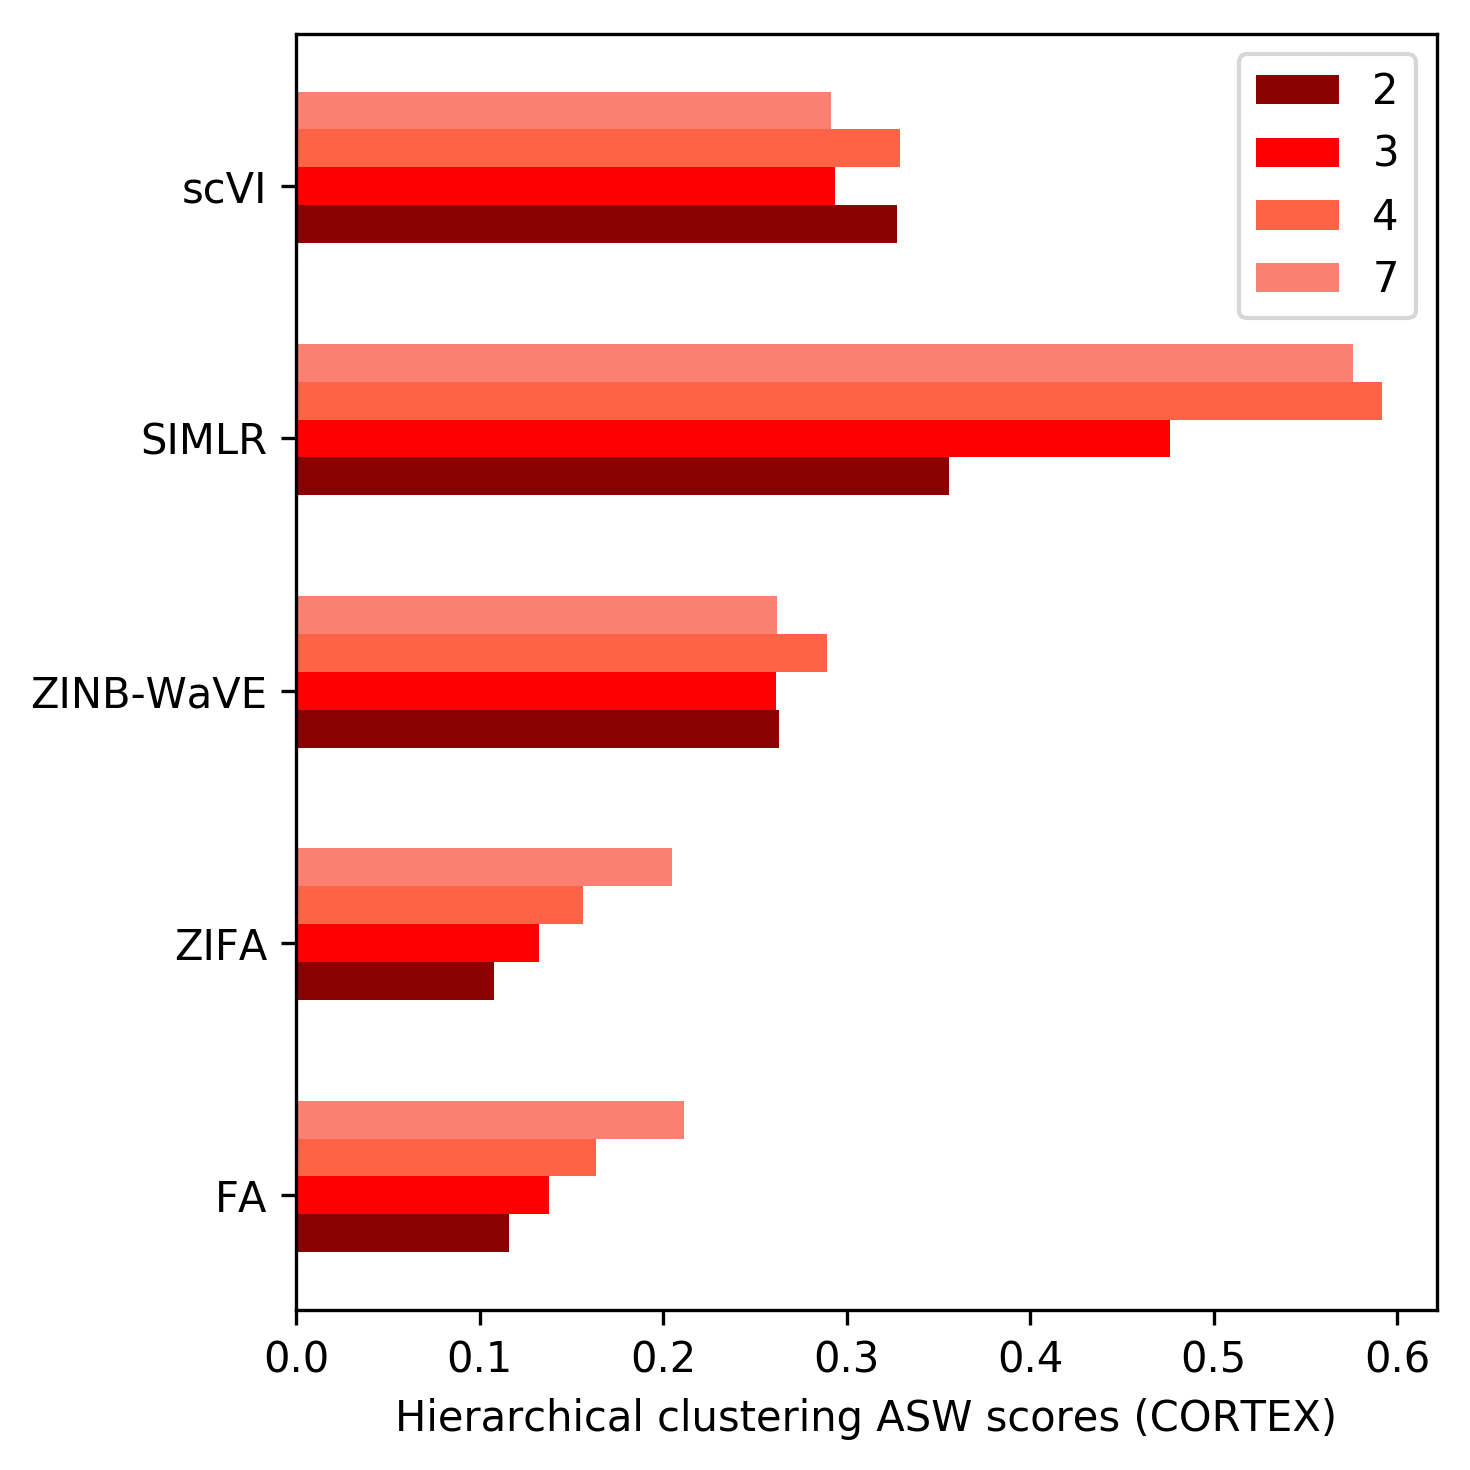

In [ ]:
l = [(0, "ASW"), (1, "ARI"), (2, "NMI")]
for i in range(3):
    
    data = zip(*fa)[l[i][0]], zip(*zifa)[l[i][0]], zip(*zinb)[l[i][0]], zip(*simlr)[l[i][0]], zip(*scVI)[l[i][0]]
    barplot_list(data, alg, 'Hierarchical clustering ' + l[i][1] +' scores (CORTEX)', prog=True, figsize=(5, 5))
    plt.savefig("zeisel_hierarchical" + l[i][1] + ".pdf", dpi=300)

# CITE SEQ

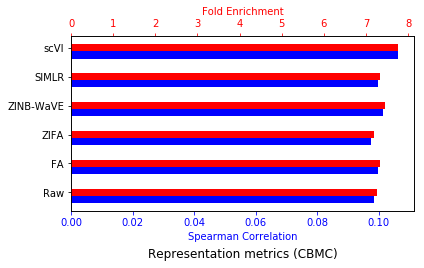

In [31]:
alg = ["Raw", "FA", "ZIFA", "ZINB-WaVE", "SIMLR", "scVI"]
data = [(0.098473750393067855, 7.2649), \
        (0.099746934926233391, 7.3459), \
        (0.097387613957984093, 7.1958), \
        (0.10141150581589038, 7.4518), \
        (0.099619616472917824, 7.3378), \
       (0.10619144922991411, 7.7559)]
barplot_CITE_list(data, alg, 'Representation metrics (CBMC)')
plt.savefig("CITE_representation.pdf", dpi=300)

## ZEILER


In [32]:
alg = ["FA", "ZIFA", "ZINB-WaVE", "SIMLR", "scVI"]

In [33]:
data = [[0.21391998556424938, 0.59116624750943825, 0.50231747503265922], \
        [0.20659129809077773, 0.76804626919745633, 0.77806177522581543], \
        [0.26024010642172596, 0.77821596684230276, 0.72163060519162336], \
        [0.65496546363239816, 0.82448501471354962, 0.80190025231822593], \
        [0.2997168, 0.77794597391165898, 0.7444437120757863]]

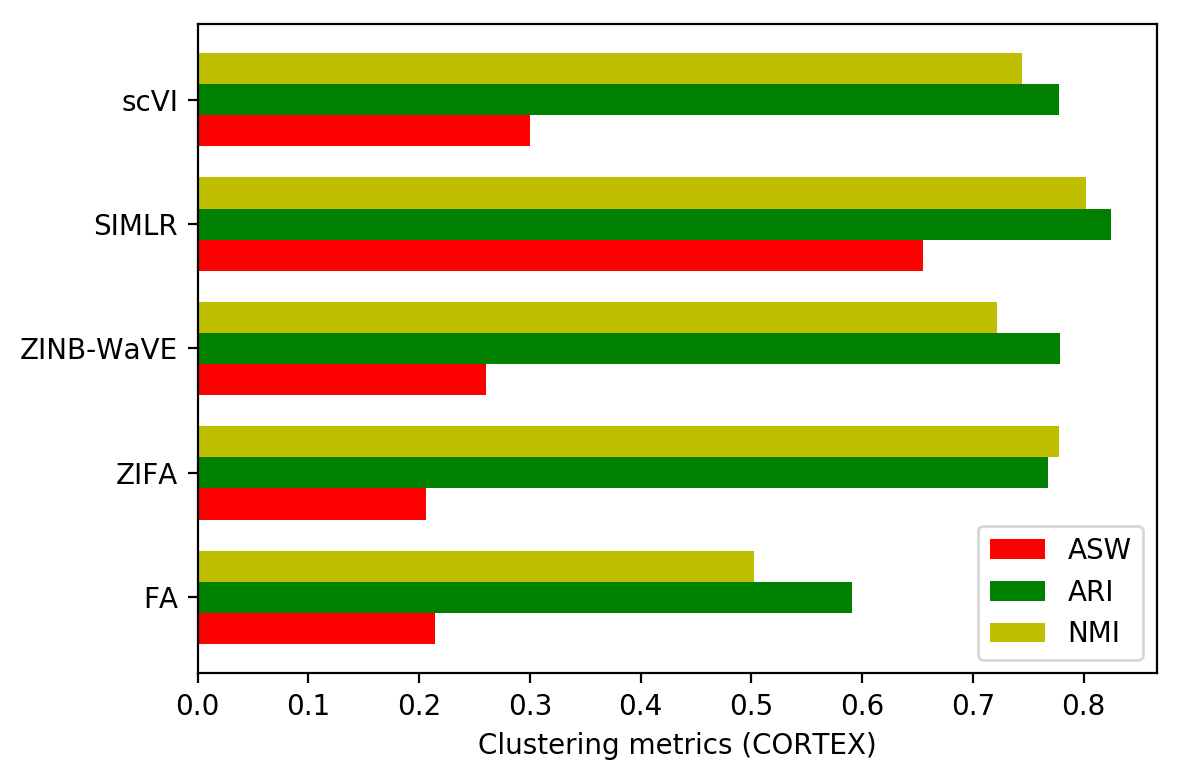

In [34]:
barplot_list(data, alg, 'Clustering metrics (CORTEX)')
plt.savefig("zeiler_clustering.pdf", dpi=300)

### PBMCs

In [7]:
alg = ["FA", "SIMLR", "DCA", "scVI\n(NoLib)", "scVI"]

In [8]:
data = [[0.31893232823756423, 0.70949147594234441, 0.6639320594878495, 0.622334973356],\
        [0.78464960298125097, 0.83127101206256038, 0.87814668767539328, 0.628411486367],\
        [0.37623665, 0.7574129556811758, 0.6677622883585378, 0.614573082867],
        [0.31492114, 0.76204345756899003, 0.6711019556258908, 0.623582453017],\
        [0.42970678, 0.79660054333307828, 0.70952528367336209, 0.627160634386]]

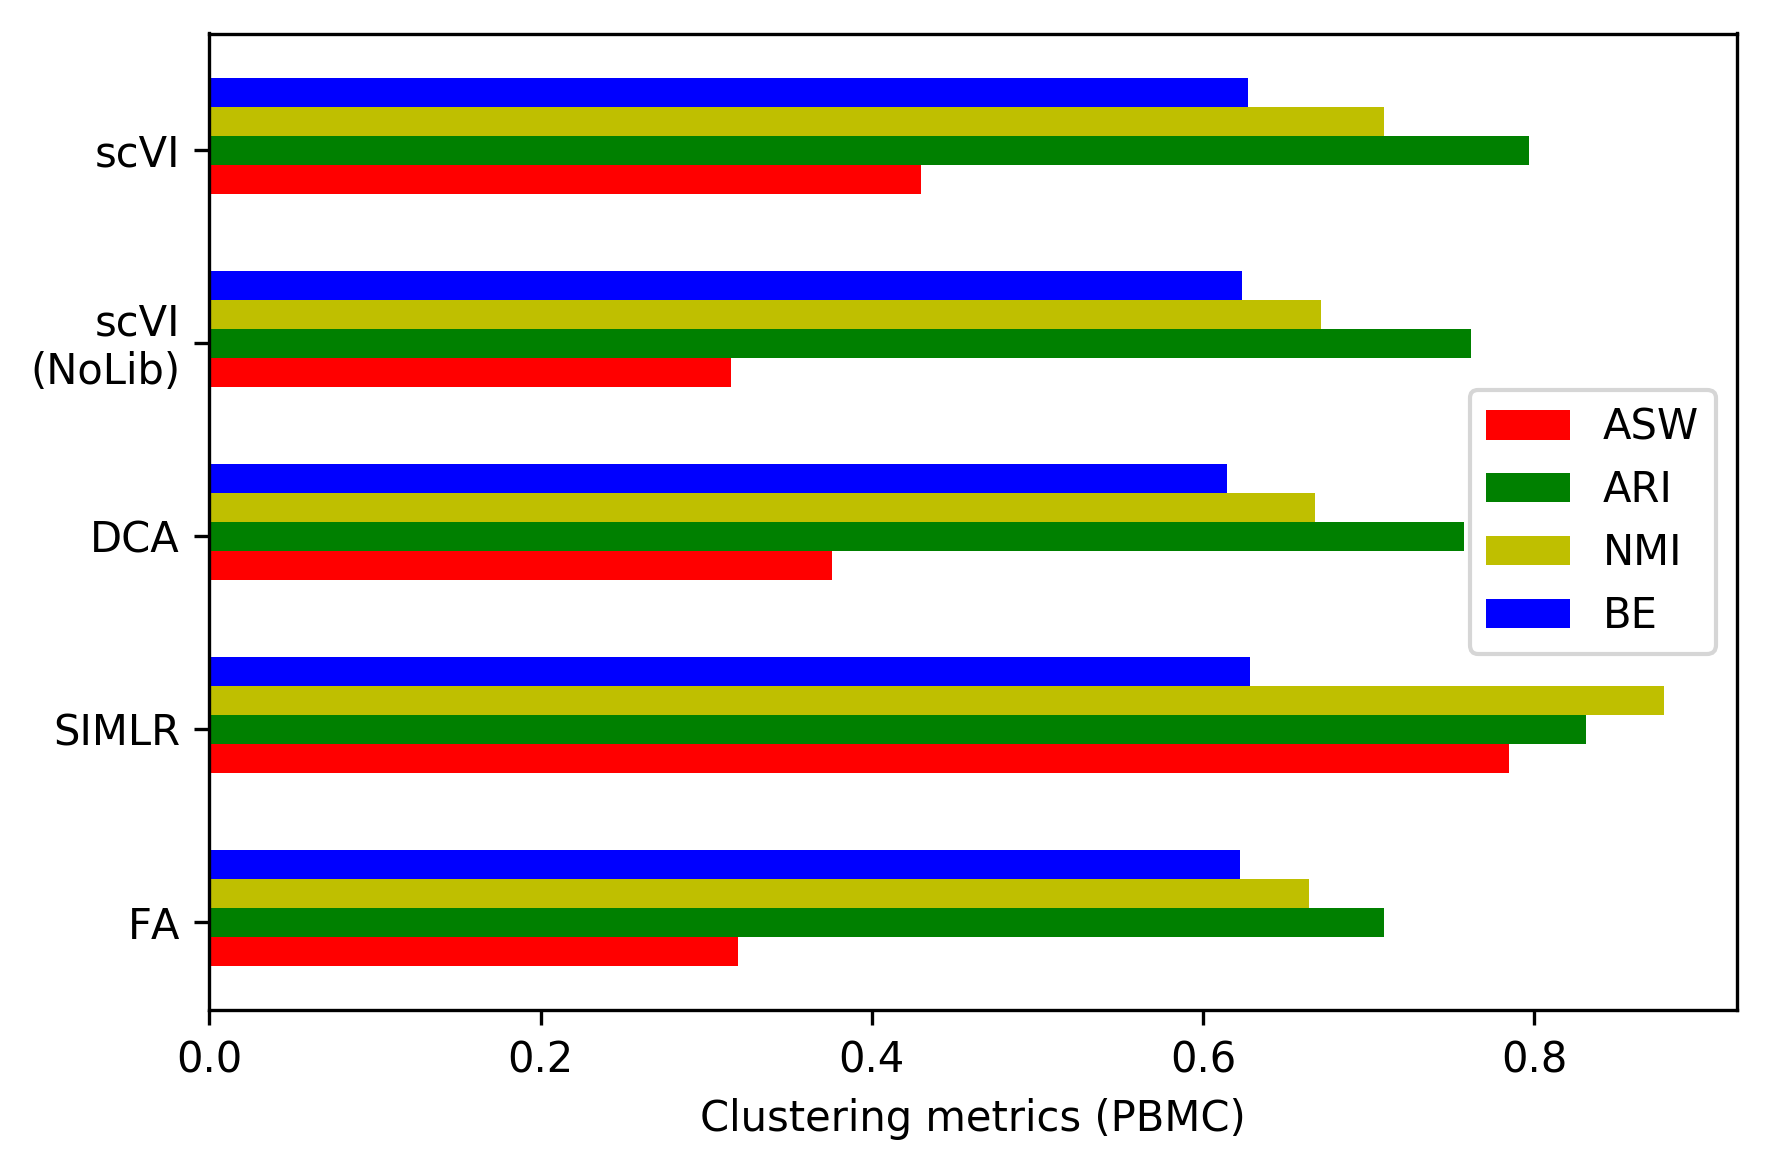

In [9]:
barplot_list(data, alg, 'Clustering metrics (PBMC)')
plt.savefig("10xPBMCs_clustering.pdf", dpi=300)

# bipolat

In [5]:
data = [[0.21954027735402515, 0.58685860355428821, 0.36856986097377797, 0.192647888467, 0.0624201044534],\
        [0.34417779654030661, 0.64755125928853896, 0.51136144259466121, 0.597048161687, 0.0409665873338],\
        [0.44694698300835106, 0.794144880698191, 0.47583467153476738, 0.34069311837, 0.019781812657], \
        #[0.39713409901470476, 0.82753505722280996, 0.56766342175660978, 0.622021949624, 0.0135243702424], \
        [0.38671855424626955, 0.71827265353852421, 0.44124130393919314, 0.563362846923, 0.0325212205764], \
        [0.4263949, 0.7829314468416665, 0.4812601239175286, 0.06775370688196845, 0.10495388], \
        [0.26030374, 0.78770354382506136, 0.49736069004851868, 0.0709799311042, 0.110213],\
        [0.36126289, 0.83652908297624851, 0.61592297966666154, 0.61157293916, 0.0185152]]

In [6]:
alg = ["PCA", "SIMLR", "Combat", "MNN", "DCA", "scVI (NoBatch)", "scVI"]
#alg = ["PCA", "SIMLR", "Combat", "SEURAT", "MNN", "scVI"]

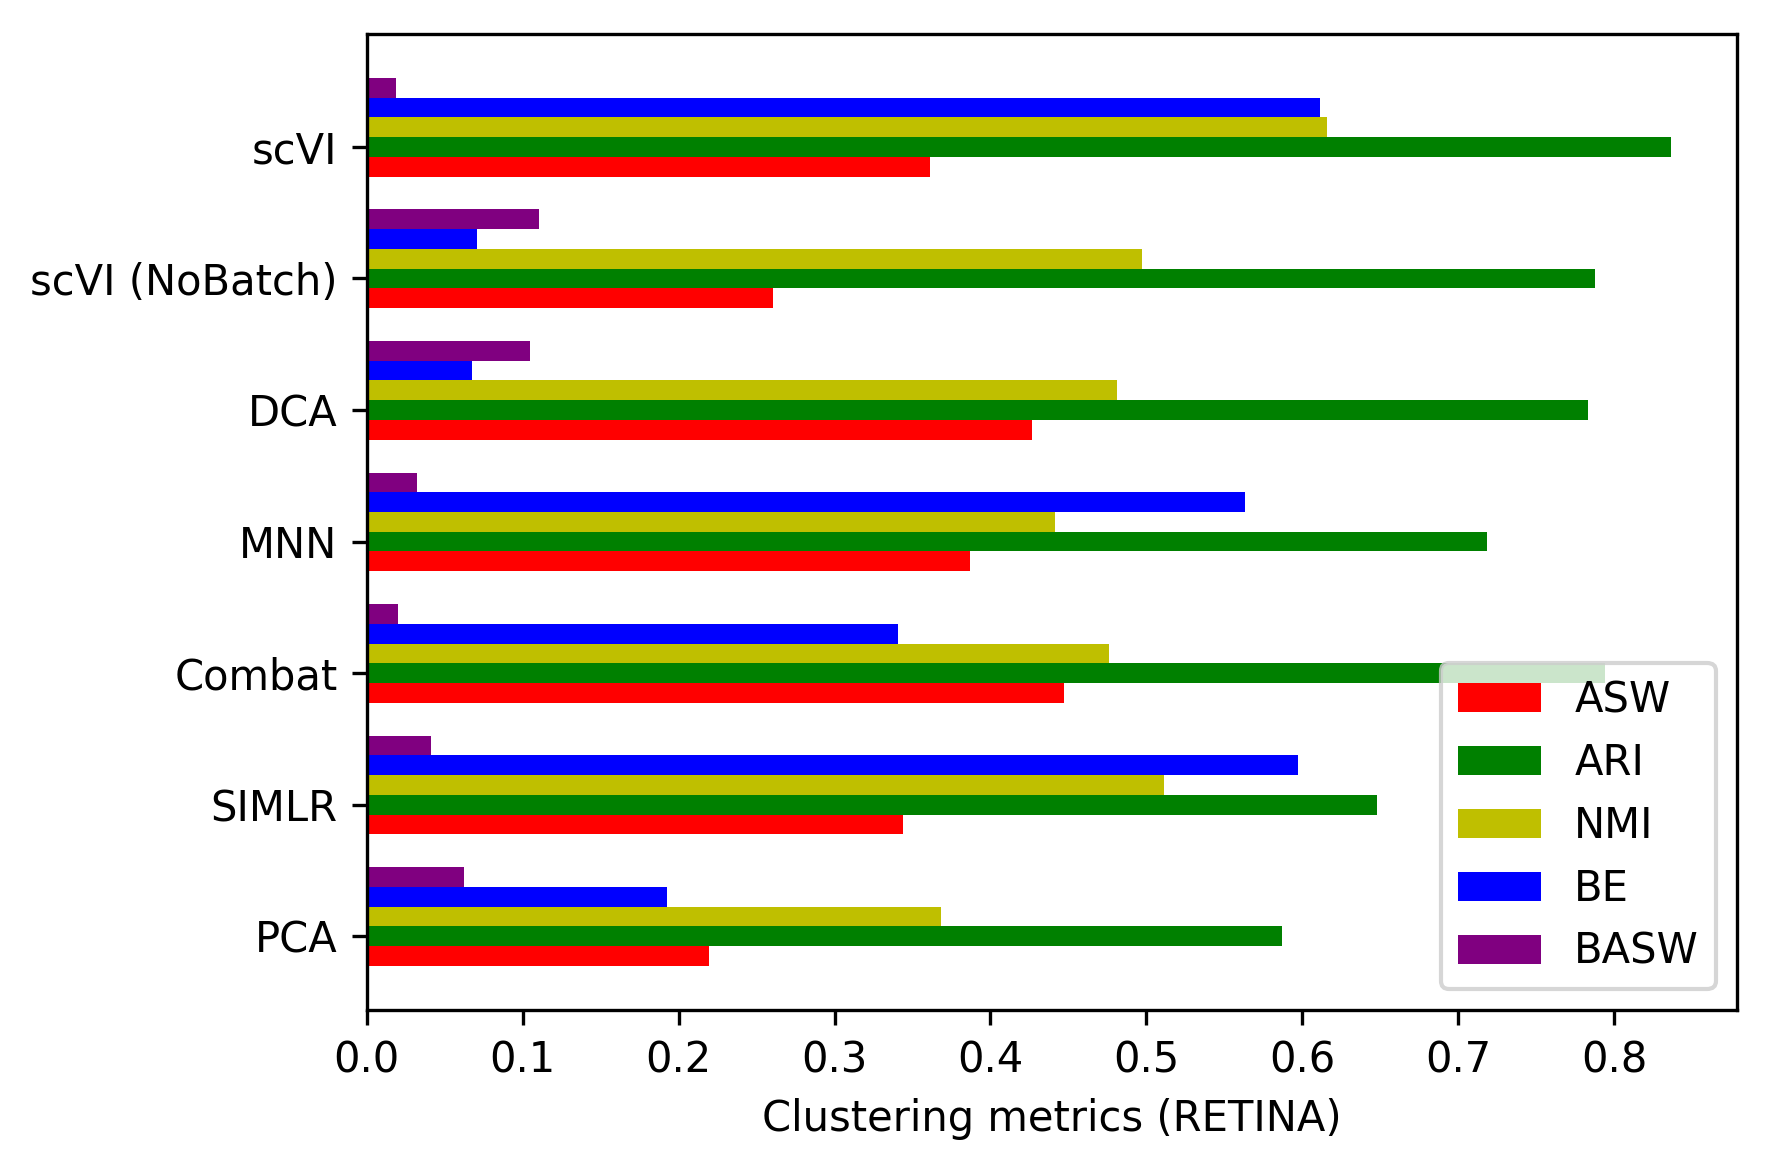

In [7]:
barplot_list(data, alg, 'Clustering metrics (RETINA)')
plt.savefig("bipolar_clustering.pdf", dpi=300)